In [1]:
import os


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
os.chdir('C:/Users/basleal/Desktop/tutorial/kaim-week-6')
print(os.getcwd())

C:\Users\basleal\Desktop\tutorial\kaim-week-6


In [4]:
path = 'C:/Users/basleal/Desktop/tutorial/kaim-week-6/data/data_ready_train.csv'

In [5]:
data=pd.read_csv(path)

In [6]:
data.head()

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,...,0,0,0,0,0,0,0,0,1,0
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,...,1,0,0,0,0,0,0,1,0,0
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,...,0,0,0,0,0,0,0,0,1,0
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,...,0,0,0,0,0,0,1,0,1,0
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,...,1,0,0,0,0,0,0,1,0,0


In [7]:
data.columns

Index(['Unnamed: 0', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
       'CustomerId', 'ProviderId', 'ProductId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ChannelId_ChannelId_2',
       'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5'],
      dtype='object')

Now we calculate the rfms values of each user to classify them as good or bad

In [7]:
from scripts.default_estimator import normalize_columns,aggregate,calculate_rfms_score
rfms=aggregate(data)
rfms

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,0.090993
1,CustomerId_10,83,1,0.090993
2,CustomerId_1001,89,5,0.461397
3,CustomerId_1002,25,11,1.011418
4,CustomerId_1003,11,6,0.553309
...,...,...,...,...
3737,CustomerId_992,4,6,0.553309
3738,CustomerId_993,25,5,0.461397
3739,CustomerId_994,0,101,9.333077
3740,CustomerId_996,67,17,1.575276


These are our rfms values and we will use those to classify the bad vs good

In [8]:
#normalize our columns
rfms=normalize_columns(rfms)
rfms

,CustomerId,Recency,Frequency,Monetary,Recency_Scaled,Frequency_Scaled,Monetary_Scaled
0,CustomerId_1,83,1,0.090993,0.922222,0.000000,0.000048
1,CustomerId_10,83,1,0.090993,0.922222,0.000000,0.000048
2,CustomerId_1001,89,5,0.461397,0.988889,0.000978,0.001059
3,CustomerId_1002,25,11,1.011418,0.277778,0.002445,0.002560
4,CustomerId_1003,11,6,0.553309,0.122222,0.001222,0.001310
...,...,...,...,...,...,...,...
3737,CustomerId_992,4,6,0.553309,0.044444,0.001222,0.001310
3738,CustomerId_993,25,5,0.461397,0.277778,0.000978,0.001059
3739,CustomerId_994,0,101,9.333077,0.000000,0.024450,0.025279
3740,CustomerId_996,67,17,1.575276,0.744444,0.003912,0.004100


In [9]:
#Compute RFMS score and classify
rfms = calculate_rfms_score(rfms)
rfms

,CustomerId,Recency,Frequency,Monetary,Recency_Scaled,Frequency_Scaled,Monetary_Scaled,RFMS_Score,Classification
0,CustomerId_1,83,1,0.090993,0.922222,0.000000,0.000048,0.368903,Good
1,CustomerId_10,83,1,0.090993,0.922222,0.000000,0.000048,0.368903,Good
2,CustomerId_1001,89,5,0.461397,0.988889,0.000978,0.001059,0.396167,Good
3,CustomerId_1002,25,11,1.011418,0.277778,0.002445,0.002560,0.112613,Good
4,CustomerId_1003,11,6,0.553309,0.122222,0.001222,0.001310,0.049649,Bad
...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,4,6,0.553309,0.044444,0.001222,0.001310,0.018537,Bad
3738,CustomerId_993,25,5,0.461397,0.277778,0.000978,0.001059,0.111722,Good
3739,CustomerId_994,0,101,9.333077,0.000000,0.024450,0.025279,0.014919,Bad
3740,CustomerId_996,67,17,1.575276,0.744444,0.003912,0.004100,0.300181,Good


As we can see we have classified our data as good vs bad

We need to merge it with our data again

In [10]:
data = data.merge(rfms[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Classification']], on='CustomerId', how='left')
data

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,DaysSinceLast,Recency,Frequency,Monetary,Classification
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,...,0,0,0,1,0,90,0,119,10.947603,Bad
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,...,0,0,1,0,0,90,0,119,10.947603,Bad
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,...,0,0,0,1,0,90,81,2,0.183915,Good
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,...,0,1,0,1,0,90,5,38,3.513670,Bad
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,...,0,0,1,0,0,90,5,38,3.513670,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,3,ProductId_6,0.091820,0.000101,...,0,0,1,0,0,0,0,573,52.889535,Bad
95658,95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5,ProductId_10,0.092004,0.000101,...,0,0,0,1,0,0,0,43,3.957583,Bad
95659,95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,3,ProductId_6,0.091910,0.000002,...,0,0,1,0,0,0,0,43,3.957583,Bad
95660,95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5,ProductId_19,0.092188,0.000303,...,1,0,0,1,0,0,0,524,48.240072,Bad


In [24]:
data

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,...,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,DaysSinceLast,Classifications,Recency,Frequency,Monetary,Classification
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,...,0,0,1,0,90,Bad,0,119,10.947603,Bad
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,...,0,1,0,0,90,Bad,0,119,10.947603,Bad
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,...,0,0,1,0,90,Good,81,2,0.183915,Good
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,...,1,0,1,0,90,Bad,5,38,3.513670,Bad
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,...,0,1,0,0,90,Bad,5,38,3.513670,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,3,ProductId_6,0.091820,0.000101,...,0,1,0,0,0,Bad,0,573,52.889535,Bad
95658,95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5,ProductId_10,0.092004,0.000101,...,0,0,1,0,0,Bad,0,43,3.957583,Bad
95659,95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,3,ProductId_6,0.091910,0.000002,...,0,1,0,0,0,Bad,0,43,3.957583,Bad
95660,95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5,ProductId_19,0.092188,0.000303,...,0,0,1,0,0,Bad,0,524,48.240072,Bad


In [25]:
#save our data
data.to_csv('data_with_rfms.csv')

In [21]:
data.columns

Index(['Unnamed: 0', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
       'CustomerId', 'ProviderId', 'ProductId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ChannelId_ChannelId_2',
       'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5', 'DaysSinceLast',
       'Classifications'],
      dtype='object')

In [24]:
aggregated_data = data.groupby('CustomerId').agg({
    'Recency': 'min',  # Most recent transaction
    'Frequency': 'sum',  # Total number of transactions
    'Monetary': 'sum'   # Total spending
}).reset_index()

In [26]:
aggregated_data

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,0.090993
1,CustomerId_10,83,1,0.090993
2,CustomerId_1001,89,25,2.306985
3,CustomerId_1002,25,121,11.125595
4,CustomerId_1003,11,36,3.319853
...,...,...,...,...
3737,CustomerId_992,4,36,3.319853
3738,CustomerId_993,25,25,2.306985
3739,CustomerId_994,0,10201,942.640733
3740,CustomerId_996,67,289,26.779687


In [28]:
from scripts.default_estimator import classify_risk_level,woe_binning
from sklearn.preprocessing import OrdinalEncoder
# Apply the classification function to create the 'Risk_Level' column
aggregated_data['Risk_Level'] = aggregated_data.apply(classify_risk_level, axis=1)
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
aggregated_data['Risk_Level_Ordinal'] = encoder.fit_transform(aggregated_data[['Risk_Level']])
aggregated_data.head(15)[['Risk_Level','Risk_Level_Ordinal','Recency','Frequency','Monetary']]

,Risk_Level,Risk_Level_Ordinal,Recency,Frequency,Monetary
0,Low,0.0,83,1,0.090993
1,Low,0.0,83,1,0.090993
2,Low,0.0,89,25,2.306985
3,High,2.0,25,121,11.125595
4,High,2.0,11,36,3.319853
5,Low,0.0,52,1,0.092096
6,Low,0.0,46,81,7.485221
7,Low,0.0,64,1,0.092004
8,Low,0.0,81,1,0.094485
9,Low,0.0,65,4,0.371324


In [29]:
aggregated_data.nunique()

CustomerId            3742
Recency                 91
Frequency              221
Monetary              2291
Risk_Level               2
Risk_Level_Ordinal       2
dtype: int64

In [32]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          3742 non-null   object 
 1   Recency             3742 non-null   int64  
 2   Frequency           3742 non-null   int64  
 3   Monetary            3742 non-null   float64
 4   Risk_Level          3742 non-null   object 
 5   Risk_Level_Ordinal  3742 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 175.5+ KB


In [33]:
aggregated_data= woe_binning(data,'Recency','Risk_Level_Ordinal')
aggregated_data

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,...,ChannelId_ChannelId_3,ChannelId_ChannelId_5,DaysSinceLast,Recency,Frequency,Monetary,Classification,Risk_Level,Risk_Level_Ordinal,woe
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,...,1,0,90,0,119,10.947603,Bad,High,2.0,-0.113097
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,...,0,0,90,0,119,10.947603,Bad,High,2.0,-0.113097
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,...,1,0,90,81,2,0.183915,Good,Low,0.0,6.170113
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,...,1,0,90,5,38,3.513670,Bad,High,2.0,1.232779
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,...,0,0,90,5,38,3.513670,Bad,High,2.0,1.232779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,3,ProductId_6,0.091820,0.000101,...,0,0,0,0,573,52.889535,Bad,High,2.0,-0.113097
95658,95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5,ProductId_10,0.092004,0.000101,...,1,0,0,0,43,3.957583,Bad,High,2.0,-0.113097
95659,95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,3,ProductId_6,0.091910,0.000002,...,0,0,0,0,43,3.957583,Bad,High,2.0,-0.113097
95660,95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5,ProductId_19,0.092188,0.000303,...,1,0,0,0,524,48.240072,Bad,High,2.0,-0.113097


In [34]:
aggregated_data.columns

Index(['Unnamed: 0', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
       'CustomerId', 'ProviderId', 'ProductId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ChannelId_ChannelId_2',
       'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5', 'DaysSinceLast',
       'Recency', 'Frequency', 'Monetary', 'Classification', 'Risk_Level',
       'Risk_Level_Ordinal', 'woe'],
      dtype='object')

In [24]:
data=data.drop(columns=['Risk_Level','woe'])
data

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,DaysSinceLast,Recency,Frequency,Monetary,Classification
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,...,0,0,0,1,0,90,0,119,10.947603,Bad
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,...,0,0,1,0,0,90,0,119,10.947603,Bad
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,...,0,0,0,1,0,90,81,2,0.183915,Good
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,...,0,1,0,1,0,90,5,38,3.513670,Bad
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,...,0,0,1,0,0,90,5,38,3.513670,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,3,ProductId_6,0.091820,0.000101,...,0,0,1,0,0,0,0,573,52.889535,Bad
95658,95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5,ProductId_10,0.092004,0.000101,...,0,0,0,1,0,0,0,43,3.957583,Bad
95659,95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,3,ProductId_6,0.091910,0.000002,...,0,0,1,0,0,0,0,43,3.957583,Bad
95660,95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5,ProductId_19,0.092188,0.000303,...,1,0,0,1,0,0,0,524,48.240072,Bad


Now we will build a model to predict the risk level

Prepare the Data

In [35]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Recency', 'Frequency', 'Monetary', 'woe']  # Include WoE-transformed variables
target = 'Risk_Level_Ordinal'
X = aggregated_data[features]  # Features
y = aggregated_data[target]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Build the Model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9550855430502805
Confusion Matrix:
[[ 5266  1225]
 [   64 22144]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      6491
         2.0       0.95      1.00      0.97     22208

    accuracy                           0.96     28699
   macro avg       0.97      0.90      0.93     28699
weighted avg       0.96      0.96      0.95     28699



Make predictions on custom data

In [42]:
new_data = [[3, 2, 1000, 0.2]]  # Example of new data (Recency, Frequency, Monetary, WoE)
prediction = model.predict(new_data)
print(f"Predicted Risk Level: {prediction}")

Predicted Risk Level: [2.]


c:\Users\basleal\Desktop\tutorial\kaim-week-6\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Our model seems to be doing well it even predicted well when we gave it a custom data which is a good thing

let's see which features are more important

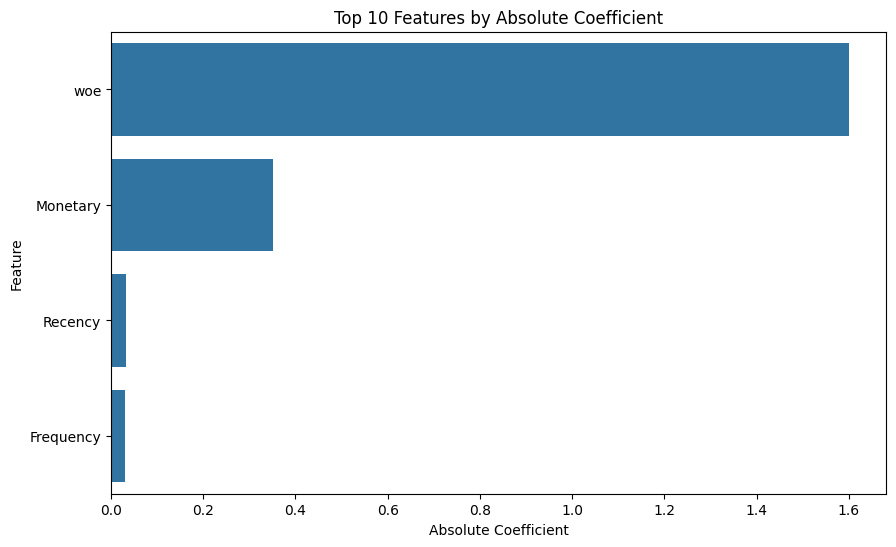

     Feature  Coefficient  Absolute Coefficient
3        woe    -1.600856              1.600856
2   Monetary     0.350613              0.350613
0    Recency    -0.033283              0.033283
1  Frequency    -0.030083              0.030083


In [44]:
# Plot feature importance (if using Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns
coefficients = model.coef_[0] # Exclude target column

# Sort the features based on importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Features by Absolute Coefficient')
plt.show()

# Print the sorted importance DataFrame
print(importance_df)

In [13]:
data[['Recency','Frequency','Monetary']].to_csv('rfm_col.csv')